# Challenge Large Scale Machine Learning 

Autor : Sarra Kazdaghli

For this challenge, a fusion of algorithms for face recognition has led to a dataset of images comparision.
This dataset is composed by:
- 14 features for image 1
- 14 features for image 2
- 8 features for the matching scores between image 1 and image 2.

The goal here is to predict whether 2 images are similar or not.
For that, I adopted the following strategy:
- Data exploration:
    - Visualize the distribution of features
    - Explore the correlation between features
    - Test on a sample some machine learning algorithms 


- First Prediction:
    - Prediction with some algorithms
       
- Prediction amelioration:
    - Amelioration with data
         - Rescale the data
         - Transform the data 
    - Amelioration with algorithms
        - Modify the architecture of the machine learning algorithms       
    - Amelioration with ensembles
        

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data exploration

We start by exploring the features presented in the dataset. We don't know the exact interpertation of each feature  but we do know that the 14th first are representative of the 1rst image, the next 14th of the 2nd image and the last ones of scores computed between the 2 images.

In [ ]:
# Load training data
xtrain = pd.read_csv('xtrain_challenge.csv')
ytrain = pd.read_csv('ytrain_challenge.csv')
ytrain = np.array(ytrain)

# Reshape ytrain
n_samples = len(xtrain)
ytrain = np.array(ytrain).reshape(n_samples)

Let's see the types of the features we have:

In [0]:
# Types of xtrain
xtrain.dtypes

fA1     float64
fA2     float64
fA3     float64
fA4       int64
fA5     float64
fA6     float64
fA7     float64
fA8     float64
fA9     float64
fA10    float64
fA11    float64
fA12    float64
fA13    float64
fA14    float64
fB1     float64
fB2     float64
fB3     float64
fB4       int64
fB5     float64
fB6     float64
fB7     float64
fB8     float64
fB9     float64
fB10    float64
fB11    float64
fB12    float64
fB13    float64
fB14    float64
s1      float64
s2      float64
s3      float64
s4      float64
s5      float64
s6      float64
s7      float64
s8      float64
dtype: object

In [0]:
# Description of the dataset
xtrain.describe()

,fA1,fA2,fA3,fA4,fA5,fA6,fA7,fA8,fA9,fA10,...,fB13,fB14,s1,s2,s3,s4,s5,s6,s7,s8
count,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,...,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06,3.196465e+06
mean,3.123656e+00,7.200140e-01,8.895844e-02,2.938227e+01,9.112188e-01,4.165448e-03,8.456615e-02,1.323673e-01,2.970159e-02,-2.833317e-04,...,-4.888641e-03,2.477718e+02,3.874350e+03,2.434998e+03,4.200151e+03,4.242067e+03,3.488791e+03,3.399066e+03,3.509614e+03,3.745971e+03
std,1.618458e+00,4.224322e-01,2.824698e-01,9.793075e+00,2.757797e-01,4.433567e-02,2.729676e-01,4.159110e-01,1.279389e-01,2.096133e-02,...,5.770911e-02,1.221232e+02,2.063822e+03,2.272729e+02,2.954367e+03,2.127659e+03,1.360081e+03,1.363354e+03,1.066627e+03,1.548290e+03
min,-4.500000e-01,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.550000e+00,-3.030000e+00,-3.000000e-01,...,-4.200000e-01,-3.087900e+02,1.212700e+03,1.511400e+03,7.218000e+02,1.133800e+03,6.682000e+02,7.200000e+02,1.358000e+03,7.107000e+02
25%,1.950000e+00,2.500000e-01,0.000000e+00,2.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,-2.000000e-02,-2.000000e-02,0.000000e+00,...,-3.000000e-02,2.214200e+02,2.420300e+03,2.296300e+03,2.086200e+03,2.735400e+03,2.457200e+03,2.335000e+03,2.742600e+03,2.620100e+03
50%,3.390000e+00,1.000000e+00,0.000000e+00,2.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,0.000000e+00,...,0.000000e+00,2.766400e+02,3.062600e+03,2.439800e+03,3.073300e+03,3.402000e+03,3.063300e+03,2.999800e+03,3.151800e+03,3.218800e+03
75%,4.380000e+00,1.000000e+00,0.000000e+00,3.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,8.000000e-02,1.000000e-02,...,2.000000e-02,3.216600e+02,4.442500e+03,2.589300e+03,5.143800e+03,4.898800e+03,4.406800e+03,4.375500e+03,3.926300e+03,4.396900e+03
max,7.940000e+00,1.000000e+00,1.000000e+00,7.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.500000e+00,7.600000e-01,2.600000e-01,...,4.400000e-01,4.814200e+02,1.204420e+04,3.035900e+03,1.666650e+04,1.181290e+04,7.731000e+03,7.580100e+03,6.949500e+03,8.524900e+03


In [3]:
# Load test data
xtest = pd.read_csv('xtest_challenge.csv')

In [11]:
df = pd.concat([xtrain, xtest])

### Similarity between test and training

When looking at the test and training set, we could find that some rows in the test set are also found in the training set:

In [89]:
common_cols = xtrain.columns.tolist()  
df21 = pd.merge(xtrain, xtest, on=common_cols, how='inner', left_index= True)

In [90]:
len(df21)

16849

So there is 16849   occurrences between the training and the testing set.
But is there duplicated images in the testing set?

In [91]:
len(xtest.loc[xtest.duplicated() == True].index.tolist())

4190

We also found out that there are some duplicated values in the testing set (4190)

### Distribution of features

We start by exploring the distribution of the given features :

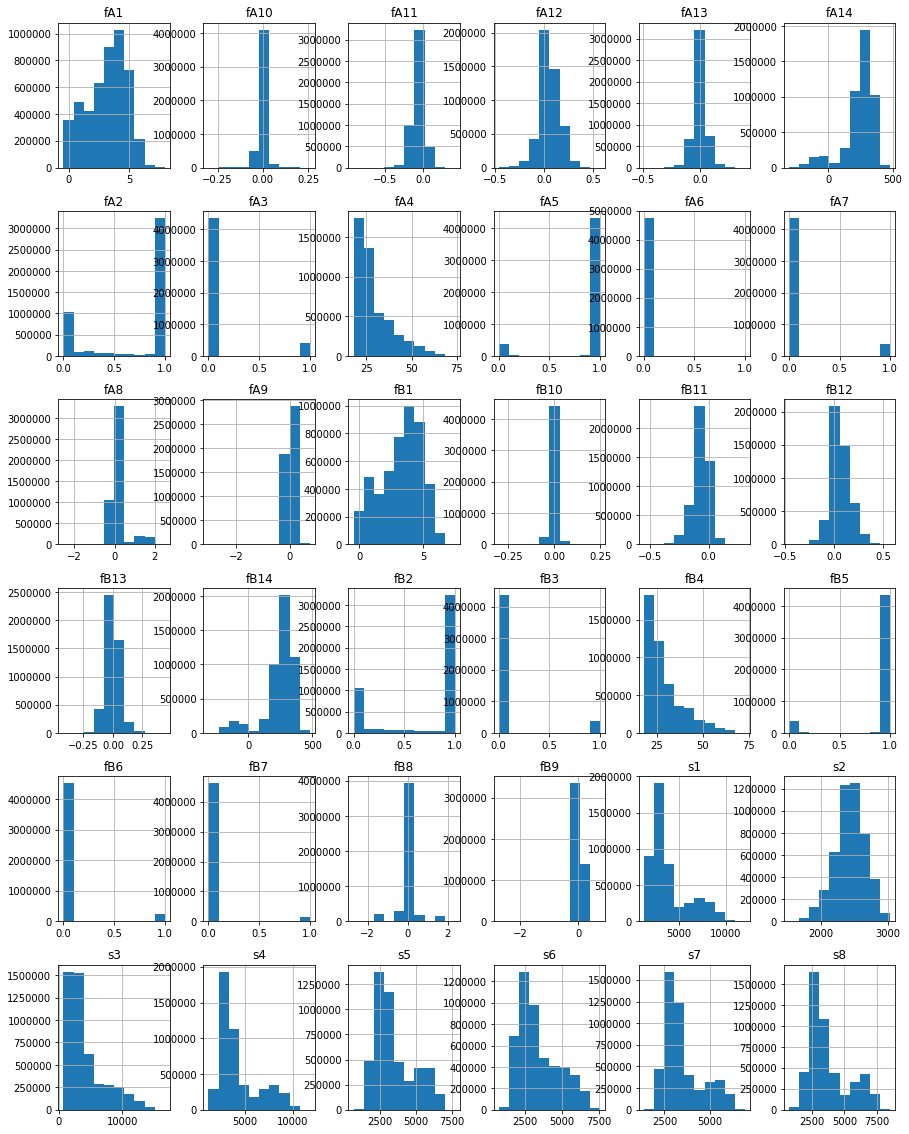

In [0]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

We notice that some features follow a gaussian distribution while some have a exponential distribution : feature fA4, fB4, s3.

Also, there are some features(['fA2',  'fA3', 'fA5', 'fA6', 'fA7', 'fA9', 'fB9', 'fB2', 'fB3', 'fB5', 'fB6', 'fB7']) that can be considered as discrete.

### Correlation between features

Let's now see if we can deduce some correlation between the features:

We start by rescaling the dataset

In [3]:
## Function to rescale data
def rescale(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    rescaled = scaler.fit_transform(df)
    df_rescaled = pd.DataFrame(rescaled, index=df.index, columns=df.columns)
    return df_rescaled

In [0]:
## Rescale all the dataframe
df_rescaled = rescale(df)

We explore the heatmap of the correlation matrix:

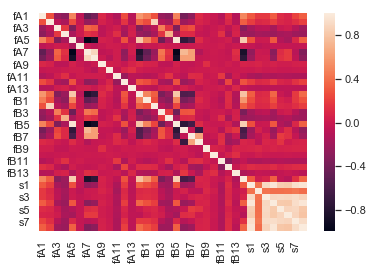

In [0]:
import seaborn as sns; sns.set()
corr = df_rescaled.corr()
ax = sns.heatmap(corr)

We notice a high correlation betwen:
-  fA7 and fA8 
- fB2, fA2
- fA14, fA5, fB5, fB14
-  s1, s3, s4, s5, s6, s7, s9

To support this observation, we look for the eigenvalues of the correlation matrix and draw the decreasing eigenvalues found 

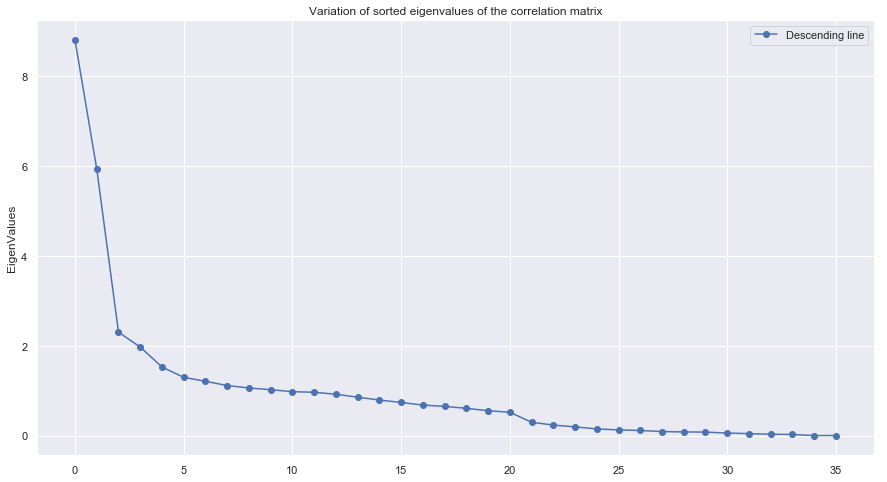

<Figure size 1080x576 with 0 Axes>

In [0]:
# Eigenvalues of the correlation matrix
df_eig = np.linalg.eigh(corr)[0]

# Graph of the eigenvalues decrease 
fig = plt.figure(figsize=(15,8))
ax = plt.subplot() 
ax.plot( np.sort(df_eig)[::-1], '-o', label = 'Descending line', )
plt.title('Variation of sorted eigenvalues of the correlation matrix')
plt.ylabel('EigenValues') 
plt.legend(loc='best')
fig = plt.figure(figsize=(15,8)) 
plt.show()


We notice that there are some eigenvalues near 0, which correpsonds to a small variation between features. Some methods of dimensiality reduction like PCA can exploit this information to aggregate features.

Let's see how many eigenvalues are below 0.1:

In [0]:
# How many eigenvalues are below 0.1
print("There are as shown in the graph", len(df_eig[np.where(df_eig <= 0.1)]),\
     "below 0.1")

There are as shown in the graph 9 below 0.1


### Explore Machine Learning Algorithms on a sample

In this section, we want to try out some machine learning algorithms for binary classification problems.

In fact, our dataset  is  large and we want to test some models on a sample only to test which is the most efficient before running it on all the dataset

In [0]:
train = pd.concat([xtrain, pd.Series(ytrain)], axis=1)

# Take a 5000 points sample
train = train.sample(5000)
xtrain_sample = train.iloc[:,:-1]
ytrain_sample = np.array(train.iloc[:,-1:]).reshape(len(train))

In [0]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_0, xtest_0, ytrain_0, ytest_0 = train_test_split(xtrain_sample, ytrain_sample, test_size=0.2, random_state = 100)

We start out with a simple **logistic regression**:

The model of logistic regression uses the sigmoid function to predict the probability of having a certain class knowing a certain input x.

Input values (x) are combined linearly using  coefficient values to predict an output value (y) as followed:
$$p(y = 1|x; \theta) = \frac{1}{1 + \exp(−\theta tx))}$$

The coefficients of the logistic regression algorithm is to be estimated from the training data. 

In [0]:
from sklearn.linear_model import LogisticRegression

# Train the classifier on a part of the data set
lr = LogisticRegression(random_state=0, solver='lbfgs').fit(xtrain_0, ytrain_0)

print("The score for logistic regression is", lr.score(xtest_0, ytest_0))

The score for logistic regression is 0.939


**DecisionTreeClassifier**

A decision tree is a representation of a binary tree. Each root node represents a single input variable (x) and a split point on that variable.

The leaf nodes of the tree contain an output variable. Decision trees have the advantage of being interpretable.

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Train the classifier on a part of the data set
dt = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0).fit(xtrain_0, ytrain_0)

# Check it on another part of the data set
yvalid_dt = dt.predict(xtest_0)

print("The score for a decision tree classifier is", (yvalid_dt == ytest_0).mean())

The score for a decision tree classifier is 0.943


**SVC**

The support vector machine algorithm aims to find the frontier between data that maximizes the minimum distance to
that frontier (the margin).

To do so, it sets up an optimization problem.

In [0]:
from sklearn.svm import SVC

# Train the classifier on a part of the data set
s = SVC(kernel="linear", C=0.025).fit(xtrain_0, ytrain_0)

# Check it on another part of the data set
yvalid_s = s.predict(xtest_0)

print("The score for a SVC is", (yvalid_s == ytest_0).mean())

The score for a SVC is 0.958


**MLP Classifier**

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=100, activation= 'relu', alpha=0.001, solver= "adam", learning_rate_init=0.01, \
                    early_stopping=False, validation_fraction=0.4, beta_1=0.1, beta_2=0.9999)
mlp.fit(xtrain_0, ytrain_0)

yvalid_mlp = mlp.predict(xtest_0)

print("The score for a MLP Classifier is", (yvalid_mlp == ytest_0).mean())

The score for a MLP Classifier is 0.901


**Random Forest Classifier**

The random forest classifier is a tree-based technique that uses a  number of decision trees
bootstrapping sets of features. 

It is highly uninterpretable but gives good performance because it reduces the variance of data.

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Train the classifier on a part of the data set
rf = RandomForestClassifier(n_jobs=-1, n_estimators=2000,
                         ).fit(xtrain_0, ytrain_0)

# Check it on another part of the data set
yvalid_rf = rf.predict(xtest_0)

print("The score for a Random Forest Classifier is", (yvalid_rf == ytest_0).mean())

The score for a Random Forest Classifier is 0.966


**XGBoost**

XGBoost is an implementation of gradient boosting. Boosting is based on combining several weak learners to become a stronger one. Weak learners are trained on remaining errors.

The objective is to minimize the loss of the model by adding weak learners using a gradient descent like procedure.
XGBoost uses models of gradient boosting decision trees.

To find the best split of features in the trees, it uses a Histogram based algorithm: it splits the for a feature into discrete bins and uses them to find the best split value of histogram.

In [0]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
 n_estimators= 1000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(xtrain_0, ytrain_0)

yvalid_gbm = gbm.predict(xtest_0)

print("The score for a xgboost is", (yvalid_gbm == ytest_0).mean())

The score for a xgboost is 0.97


**Lightgbm**

Lightgbm is also a gradient boosting algorithm developed by Microsoft. Different from XGBoost, LightGBM uses Gradient-based One-Side Sampling (GOSS) to filter out the data instances in order to find a split value.

GOSS keeps all the instances with large gradients and performs random sampling on the instances with small gradients.

Lightgbm is used because it can have a near performance to xgboost and is lighter in training time.

In [0]:
import lightgbm as lgb

lg = lgb.LGBMClassifier(num_leaves=3000,
              learning_rate =0.1, num_iterators=4000,
n_estimators = 200, n_jobs=-1, silent=False).fit(xtrain_0, ytrain_0)

yvalid_lg = lg.predict(xtest_0)

print("The score for a lightgbm is", (yvalid_lg == ytest_0).mean())

The score for a xgboost is 0.973


**Conclusion**

After running all these models, we have found out that the lightgbm gives the best performance in comparision with other algorithms.

In order of performance, we have:
lightgbm > xgboost > Random Forest Classifier > SVC > Decision tree classifier > Logisitic regression > MLP classifier.

So, in the next section, we will try to get a first prediction with the lightgbm classifier by tuning certain parameters and see how it performs.

We will also try out a neural network algorithm as it is more sensitive to feature engineering and data transformation and see how we can drastically improve the performance of a simple straightforward neural network.

## First prediction

In this section, we will try first to tune some hyperparameters to optimise the performances of the lightgbm algorithm.

Then, we will try a neural network algorithm without much of an optimization, algorithm that we will try to outperform in further sections.

**Lightgbm**

For the lightgbm algorithm, we tried different parameters:
   - Boosting: gbdt(traditional Gradient Boosting Decision Tree), rf (random forests) or dart (Dropouts meet Multiple Additive Regression Trees)
   - learning_rate: shrinkage rate (0.2, 0.1 or 0.01)
   - num_iterations: number of boosting iterations (1000, 2000, 4000)
   - num_leaves:  max number of leaves in one tree (100, 1000, 3000)
   - n_estimators: number of estimators trees (100, 200, 300)
   
In tuning these parameters, for better accuracy, we could increase the number of iterations and the number of maximum leaves. But, to avoid overfitting, a good idea is to not have a too small learning rate.

In [0]:
import lightgbm as lgb

lg = lgb.LGBMClassifier(boosting='dart',  max_depth = 25, learning_rate = 0.1, num_iterations=4000,
              num_leaves = 3000, objective='binary', metrics='binary_error',
n_estimators = 200, n_jobs=-1, silent=False).fit(xtrain, ytrain)

After tuning, we realised a good prediction with the above chosen parameters on the test dataset:
prediction of 0.994411282552.

**Neural Network**

We also try to run the data through a feedforward neural network with a simple architecture:

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(36,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(36, activation='relu')(x)
# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain], ytrain, epochs=10, batch_size=1000)

Using TensorFlow backend.


Epoch 1/10
3196465/3196465 [==============================] - 150s 47us/step - loss: 4.6076 - acc: 0.7141
Epoch 2/10
3196465/3196465 [==============================] - 169s 53us/step - loss: 4.6055 - acc: 0.7143
Epoch 3/10
3196465/3196465 [==============================] - 203s 64us/step - loss: 4.6055 - acc: 0.7143
Epoch 4/10
3196465/3196465 [==============================] - 189s 59us/step - loss: 4.6055 - acc: 0.7143
Epoch 5/10
3196465/3196465 [==============================] - 187s 58us/step - loss: 4.6055 - acc: 0.7143
Epoch 6/10
3196465/3196465 [==============================] - 191s 60us/step - loss: 4.6055 - acc: 0.7143
Epoch 7/10
3196465/3196465 [==============================] - 195s 61us/step - loss: 4.6055 - acc: 0.7143
Epoch 8/10
3196465/3196465 [==============================] - 212s 66us/step - loss: 4.6055 - acc: 0.7143
Epoch 9/10
3196465/3196465 [==============================] - 186s 58us/step - loss: 4.6055 - acc: 0.7143
Epoch 10/10
3196465/3196465 [=================

In [0]:
from sklearn.externals import joblib

# save the model to disk
filename = 'model_nn_simple.sav'
joblib.dump(model, filename)

['model_nn_simple.sav']

We notice that we this architecture and with the raw data, the neural network does not perform very well.

That's why, in the next sections, we will try to improve performance by data transformations and modifying the architecture.

## Prediction Amelioration

In this section, we will try to ameliorate the prediction deduced from the raw dataset by different methods of data transformation, complexifying algorithms and combining models.

### Amelioration with data

Thanks to the observations in the data exploration section, we can think of improving the prediction by data transformation.

We will try to :
- Rescale the data
- Apply PCA
- Applying logarithm and data discretization

#### Rescale the data

For the neural network algorithm, it can be a good idea to rescale the data to the bounds of the activation functions.

We are using a sigmoid function. So, the rescaling can be done between 0 and 1.
To this end, we use a MinMaxScaler:

**MinMaxScaling**

In [0]:
def rescaleMinMax(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    min_max = scaler.fit_transform(df)
    return min_max

In [0]:
# Rescaling to [0,1] the training set
train_min_max = rescaleMinMax(xtrain)

In [0]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_1, xtest_1, ytrain_1, ytest_1 = train_test_split(train_min_max, ytrain, test_size=0.2, random_state = 100)

Let's apply now the simple architecture of neural network afer min max scaling:

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(36,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain_1], ytrain_1, epochs=10, batch_size=1000, validation_data=([xtest_1], ytest_1))

Train on 2557172 samples, validate on 639293 samples
Epoch 1/10
2557172/2557172 [==============================] - 142s 55us/step - loss: 0.0735 - acc: 0.9735 - val_loss: 0.0619 - val_acc: 0.9775
Epoch 2/10
2557172/2557172 [==============================] - 149s 58us/step - loss: 0.0550 - acc: 0.9798 - val_loss: 0.0523 - val_acc: 0.9807
Epoch 3/10
2557172/2557172 [==============================] - 156s 61us/step - loss: 0.0514 - acc: 0.9810 - val_loss: 0.0487 - val_acc: 0.9820
Epoch 4/10
2557172/2557172 [==============================] - 159s 62us/step - loss: 0.0493 - acc: 0.9816 - val_loss: 0.0493 - val_acc: 0.9814
Epoch 5/10
2557172/2557172 [==============================] - 161s 63us/step - loss: 0.0479 - acc: 0.9821 - val_loss: 0.0475 - val_acc: 0.9823
Epoch 6/10
2557172/2557172 [==============================] - 150s 59us/step - loss: 0.0469 - acc: 0.9825 - val_loss: 0.0447 - val_acc: 0.9832
Epoch 7/10
2557172/2557172 [==============================] - 153s 60us/step - loss: 0.04

With the same number of epochs, we notice a great improvement of performances. we go from 0.7143 to 0.9835 on the training set with a score of 0.9835 on the test set.

We can be confident that with the optimisation of the neural network, we can obtain good results on the testing dataset.

In [0]:
plot_model(model, to_file='model_plot_nn_simple_MinMax.png', show_shapes=True, show_layer_names=True)


We save the model:

In [0]:
from sklearn.externals import joblib

# save the model to disk
filename = 'model_nn_simple_MinMax.sav'
joblib.dump(model, filename)

['model_nn_simple_MinMax.sav']

**Standard Scaling**

Another type of scaling is the standard scaling using the arithmetic mean and standard deviation of the data.

In [5]:
# Rescale the training set
train_scaled = rescale(xtrain)

In [0]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_2, xtest_2, ytrain_2, ytest_2 = train_test_split(train_scaled, ytrain, test_size=0.2, random_state = 100)

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(36,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain_2], ytrain_2, epochs=10, batch_size=1000, validation_data=([xtest_2], ytest_2))

Train on 2557172 samples, validate on 639293 samples
Epoch 1/10
2557172/2557172 [==============================] - 139s 54us/step - loss: 0.0512 - acc: 0.9811 - val_loss: 0.0426 - val_acc: 0.9841
Epoch 2/10
2557172/2557172 [==============================] - 150s 59us/step - loss: 0.0408 - acc: 0.9846 - val_loss: 0.0403 - val_acc: 0.9848
Epoch 3/10
2557172/2557172 [==============================] - 154s 60us/step - loss: 0.0376 - acc: 0.9857 - val_loss: 0.0374 - val_acc: 0.9860
Epoch 4/10
2557172/2557172 [==============================] - 155s 61us/step - loss: 0.0353 - acc: 0.9865 - val_loss: 0.0363 - val_acc: 0.9862
Epoch 5/10
2557172/2557172 [==============================] - 154s 60us/step - loss: 0.0335 - acc: 0.9872 - val_loss: 0.0358 - val_acc: 0.9865
Epoch 6/10
2557172/2557172 [==============================] - 151s 59us/step - loss: 0.0319 - acc: 0.9877 - val_loss: 0.0358 - val_acc: 0.9866
Epoch 7/10
2557172/2557172 [==============================] - 151s 59us/step - loss: 0.03

With this method, we obtained an even better performance: 0.9894 on the train dataset and 0.9876 on the test.

But, we know that mean and standard deviation are sensitive to outliers. Moreover, we have noticed that not all input features are gaussian distributed, and for non gaussian distribution, this technique does not retain the input distribution at the output.

In [0]:
from sklearn.externals import joblib

# save the model to disk
filename = 'model_nn_simple_Scaled.sav'
joblib.dump(model, filename)

['model_nn_simple_Scaled.sav']

#### Transform the data

As we have seen above in the data exploration, some used features are highly correlation and we have found nearly 9 eigenvalues almost null on the correlation matrix.

In this case, to reduce dimensiality but also combine features, we use PCA method:

**Dimensiality reduction: PCA**

In [0]:
def applyPCA(df, n):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n, svd_solver='full')
    df_pca = pca.fit_transform(df)
    df_pca = pd.DataFrame(df_pca, columns=['PCA%i' % i for i in range(n)], index=df.index)
    return df

In [0]:
# Apply PCA on training dataset
train_pca = applyPCA(train_scaled, 25)

In [0]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_3, xtest_3, ytrain_3, ytest_3 = train_test_split(train_pca, ytrain, test_size=0.2, random_state = 100)

Let's run the transformed dataset on a straightforward neural network:

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(36,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain_3], ytrain_3, epochs=10, batch_size=1000, validation_data=([xtest_3], ytest_3))

Using TensorFlow backend.


Train on 2557172 samples, validate on 639293 samples
Epoch 1/10
2557172/2557172 [==============================] - 171s 67us/step - loss: 0.0519 - acc: 0.9809 - val_loss: 0.0428 - val_acc: 0.9841
Epoch 2/10
2557172/2557172 [==============================] - 171s 67us/step - loss: 0.0409 - acc: 0.9846 - val_loss: 0.0397 - val_acc: 0.9851
Epoch 3/10
2557172/2557172 [==============================] - 173s 67us/step - loss: 0.0376 - acc: 0.9857 - val_loss: 0.0374 - val_acc: 0.9858
Epoch 4/10
2557172/2557172 [==============================] - 174s 68us/step - loss: 0.0354 - acc: 0.9865 - val_loss: 0.0365 - val_acc: 0.9863
Epoch 5/10
2557172/2557172 [==============================] - 174s 68us/step - loss: 0.0335 - acc: 0.9871 - val_loss: 0.0361 - val_acc: 0.9863
Epoch 6/10
2557172/2557172 [==============================] - 175s 68us/step - loss: 0.0319 - acc: 0.9877 - val_loss: 0.0353 - val_acc: 0.9867
Epoch 7/10
2557172/2557172 [==============================] - 173s 68us/step - loss: 0.03

We obtained with PCA good performance results but as high as with the standard rescaling: 0.9894 on the train and 0.9878 on the test.

In [0]:
from sklearn.externals import joblib

# save the model to disk
filename = 'model_nn_simple_PCA.sav'
joblib.dump(model, filename)

['model_nn_simple_PCA.sav']

**Transformation based on data distribution**

As we ploted the distribution of features values, we noticed 3 things:
    
   1- Some features follow a gaussian distribution
   
   2- Features with exponential distribution: ['fA4', 'fB4', 's3']
   
   3- Features that can be considered as discrete: ['fA2',  'fA3', 'fA5', 'fA6', 'fA7', 'fA9', 'fB9', 'fB2', 'fB3', 'fB5', 'fB6', 'fB7']

If we take into account these points, we can transform the data by:
  - Applying a logarithm on the exponential features
  - Discretizing the ones that can be considered as categorical 

In [6]:
# Apply a logarithm on features
def applyLog(df, columns):
    new_df = df.copy()
    for col in columns:
        minimum = min(df[col])
        if minimum < 0:
            new_df[col] = np.log(abs(round(minimum)) + 1 + df['fA4'])
        else:
            new_df[col] = np.log(df[col])
    return new_df

In [21]:
train_log = applyLog(xtrain, ['fA4', 'fB4', 's3'])

In [7]:
# Discretize
def applyDiscretizer(df, columns):
    new_df = df.copy()
    for col in columns:
        from sklearn.preprocessing import KBinsDiscretizer
        # transform the dataset with KBinsDiscretizer
        bins = len(set(np.histogram(df[col], bins='auto')[0]))
        if bins > 1:
            enc = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
            new_df[col] = enc.fit_transform(np.array(df[col]).reshape(-1,1))
    return new_df

In [22]:
cols = ['fA2',  'fA3', 'fA5', 'fA6', 'fA7', 'fA9', 'fB9', 'fB2', 'fB3', 'fB5', 'fB6', 'fB7']
xtrain_disc = applyDiscretizer(train_log, cols)

In [23]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_4, xtest_4, ytrain_4, ytest_4 = train_test_split(xtrain_disc, ytrain, test_size=0.2, random_state = 100)

Let's see the output performance on the neural network:

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(36,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain_4], ytrain_4, epochs=10, batch_size=1000, validation_data=([xtest_4], ytest_4))

Train on 2557172 samples, validate on 639293 samples
Epoch 1/10
2557172/2557172 [==============================] - 172s 67us/step - loss: 4.6033 - acc: 0.7144 - val_loss: 4.6149 - val_acc: 0.7137
Epoch 2/10
2557172/2557172 [==============================] - 172s 67us/step - loss: 4.6031 - acc: 0.7144 - val_loss: 4.6149 - val_acc: 0.7137
Epoch 3/10
2557172/2557172 [==============================] - 172s 67us/step - loss: 4.6031 - acc: 0.7144 - val_loss: 4.6149 - val_acc: 0.7137
Epoch 4/10
2557172/2557172 [==============================] - 171s 67us/step - loss: 4.6031 - acc: 0.7144 - val_loss: 4.6149 - val_acc: 0.7137
Epoch 5/10
2557172/2557172 [==============================] - 173s 68us/step - loss: 4.6031 - acc: 0.7144 - val_loss: 4.6149 - val_acc: 0.7137
Epoch 6/10
2557172/2557172 [==============================] - 160s 63us/step - loss: 4.6031 - acc: 0.7144 - val_loss: 4.6149 - val_acc: 0.7137
Epoch 7/10
2557172/2557172 [==============================] - 155s 61us/step - loss: 4.60

In this case, we did not rescale the data before applying the transformations.

The algorithm did not perform as with the rescaling but outperformed before the transformation 0.7144 > 0.7143.

In [0]:
from sklearn.externals import joblib

# save the model to disk
filename = 'model_nn_simple_log_disc.sav'
joblib.dump(model, filename)

['model_nn_simple_log_disc.sav']

Let's try combining rescaling and transformation:

#### Combine Scaling and Transformation

In [9]:
train_log_scaled = applyLog(train_scaled, ['fA4', 'fB4', 's3'])
cols = ['fA2',  'fA3', 'fA5', 'fA6', 'fA7', 'fA9', 'fB9', 'fB2', 'fB3', 'fB5', 'fB6', 'fB7']
train_disc_scaled = applyDiscretizer(train_log_scaled, cols)

In [0]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_5, xtest_5, ytrain_5, ytest_5 = train_test_split(train_disc_scaled, ytrain, test_size=0.2, random_state = 100)

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(36,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain_5], ytrain_5, epochs=10, batch_size=1000, validation_data=([xtest_5], ytest_5))

Using TensorFlow backend.


Train on 2557172 samples, validate on 639293 samples
Epoch 1/10
2557172/2557172 [==============================] - 140s 55us/step - loss: 0.0898 - acc: 0.9695 - val_loss: 0.0632 - val_acc: 0.9774
Epoch 2/10
2557172/2557172 [==============================] - 155s 61us/step - loss: 0.0588 - acc: 0.9788 - val_loss: 0.0586 - val_acc: 0.9784
Epoch 3/10
2557172/2557172 [==============================] - 159s 62us/step - loss: 0.0529 - acc: 0.9807 - val_loss: 0.0508 - val_acc: 0.9815
Epoch 4/10
2557172/2557172 [==============================] - 150s 59us/step - loss: 0.0503 - acc: 0.9815 - val_loss: 0.0491 - val_acc: 0.9822
Epoch 5/10
2557172/2557172 [==============================] - 153s 60us/step - loss: 0.0483 - acc: 0.9822 - val_loss: 0.0494 - val_acc: 0.9817
Epoch 6/10
2557172/2557172 [==============================] - 155s 60us/step - loss: 0.0470 - acc: 0.9825 - val_loss: 0.0483 - val_acc: 0.9820
Epoch 7/10
2557172/2557172 [==============================] - 152s 59us/step - loss: 0.04

This algorithm did not perform as much as with the rescaling alone. But, it reduced the factor of overfitting.

In [0]:
from sklearn.externals import joblib

# save the model to disk
filename = 'model_nn_simple_log_disc_scaled.sav'
joblib.dump(model, filename)

['model_nn_simple_log_disc_scaled.sav']

**Introduce OneHotEncoding on discrete features**

Now that we have some discrete features, we can try out onehotenconding them to have their values between 0 and 1.
 and with this  model, we do not assume a natural ordering between categories. 

In [8]:
def oneHotEncode(df):
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(categories='auto', handle_unknown='ignore')
    enc.fit(df)
    cat = enc.transform(df)
    return cat, enc

In [10]:
# One hot encode columns
cols = ['fA2',  'fA3', 'fA5', 'fA6', 'fA7', 'fA9', 'fB9', 'fB2', 'fB3', 'fB5', 'fB6', 'fB7']
train_cat, enc = oneHotEncode(train_disc_scaled[cols])

In [11]:
# See how many categories were found on image 1 and image 2
i = 0
img1 = 0
img2 = 0
for categ in enc.categories_:
    if i < 6:
        img1 = img1 + len(categ)
    else:
        img2 = img2 + len(categ)
    i+=1

print('img1:', img1)
print('img2:', img2)

img1: 324
img2: 280


In [12]:
train_cols_to_keep = train_disc_scaled.loc[:, ~train_disc_scaled.columns.isin(cols)]

In [ ]:
# Concatenate with other features
from scipy.sparse import csr_matrix, hstack
train_concat = hstack([train_cols_to_keep.iloc[:,:8],train_cat[:,:img1],train_cols_to_keep.iloc[:,8:16], train_cat[:,img1:img1+img2], train_cols_to_keep.iloc[:,16:]])

In [18]:
train_concat.shape[1]

628

In [15]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_6, xtest_6, ytrain_6, ytest_6 = train_test_split(train_concat, ytrain, test_size=0.2, random_state = 100)

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(628,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])


Using TensorFlow backend.


In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot_nn_simple.png', show_shapes=True, show_layer_names=True)

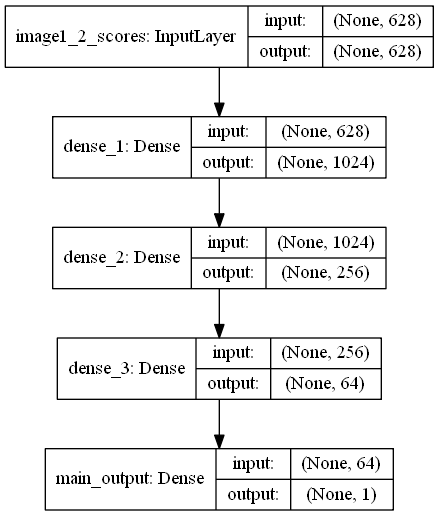

In [7]:
from IPython.display import Image
Image("model_plot_nn_simple.png")

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain_6], ytrain_6, epochs=10, batch_size=1000, validation_data=([xtest_6], ytest_6))

This methods reduces overfitting and produces good results with a simple architecure. Let's try to run it on a more complex one.

### Amelioration with algorithms

 In this section, we will try out another architecture of the neural network that gives a better interpertation the features:
 - Train image 1 features
 - Train image 2 features
 - Concatenate the two parts and train them
 - Train the scores
 - Concatenate with the above and train

We start by applying rescaling, logarithm transformation, discretization and one hot encoding on the dataset:

In [12]:
# Rescale the dataset
df_scaled = rescale(df)

In [13]:
# Transform the dataset 
df_log_scaled = applyLog(df_scaled, ['fA4', 'fB4', 's3'])
cols = ['fA2',  'fA3', 'fA5', 'fA6', 'fA7', 'fA9', 'fB9', 'fB2', 'fB3', 'fB5', 'fB6', 'fB7']
df_disc_scaled = applyDiscretizer(df_log_scaled, cols)

In [14]:
# One hot encoding
cols = ['fA2',  'fA3', 'fA5', 'fA6', 'fA7', 'fA9', 'fB9', 'fB2', 'fB3', 'fB5', 'fB6', 'fB7']
df_cat, enc = oneHotEncode(df_disc_scaled[cols])

In [15]:
# See how many categories were found on image 1 and image 2
i = 0
img1 = 0
img2 = 0
for categ in enc.categories_:
    if i < 6:
        img1 = img1 + len(categ)
    else:
        img2 = img2 + len(categ)
    i+=1

print('img1:', img1)
print('img2:', img2)

img1: 325
img2: 286


In [16]:
df_cols_to_keep = df_disc_scaled.loc[:, ~df_disc_scaled.columns.isin(cols)]

In [17]:
# Concatenate with other features
from scipy.sparse import csr_matrix, hstack
df_concat = hstack([df_cols_to_keep.iloc[:,:8],df_cat[:,:img1],df_cols_to_keep.iloc[:,8:16], df_cat[:,img1:img1+img2], df_cols_to_keep.iloc[:,16:]])

In [18]:
df_concat.shape

(4794684, 635)

In [19]:
len(xtrain)

3196465

In [21]:
df_concat = df_concat.tocsr()

In [22]:
df_train = df_concat[:3196465]
df_test = df_concat[3196465:]

We now train the resulted dataframe on the training data set using the new architecture:

In [8]:
from keras.layers import Input, Dense, concatenate
from keras.layers.normalization import BatchNormalization
from keras.models import Model
main_input = Input(shape=(325+8,), name='image1')

x = Dense(1024, activation='relu')(main_input)
first_out = Dense(256, activation='sigmoid')(x)

second_input = Input(shape=(286+8,), name='image2')
x = Dense(1024, activation='relu')(second_input)
second_out = Dense(256, activation='sigmoid')(x)

x = concatenate([first_out, second_out])
x = Dense(1024, activation='relu')(x)
third_out = Dense(256, activation='sigmoid')(x)

x1 = Input(shape=(8,), name='scores1')
s1 = Dense(256, activation='relu')(x1)
s1 = concatenate([third_out, s1])
s1 = Dense(1024, activation='relu')(s1)
s1 = Dense(256, activation='relu')(s1)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(s1)

model = Model(inputs=[main_input, second_input, x1], outputs=[main_output])


In [10]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot_nn_advanced.png', show_shapes=True, show_layer_names=True)

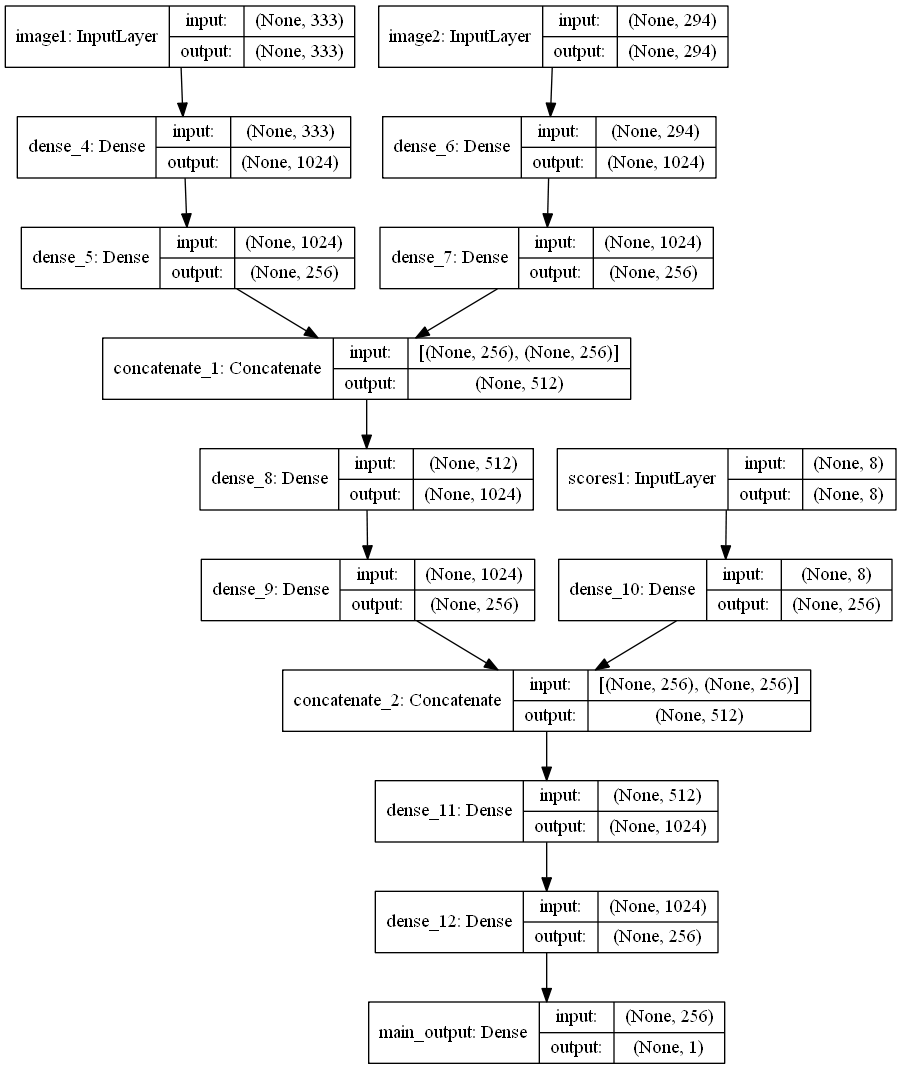

In [11]:
from IPython.display import Image
Image("model_plot_nn_advanced.png")

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([df_train[:,:img1+8],df_train[:,img1+8:img1+img2+16], df_train[:,img1+img2+16:]], ytrain, epochs=100, batch_size=1000) 

With this architecture, we obtained a better result on the testing set of 0.994687840222

### Amelioration with model combination

In this section, we will try to test how the combination of 2 models can perfom.

For this, we divide the dataset into 3 parts:
1- The nearest neighbor to the testing data set: we will use this data to evaluate our models
2- One part to train on the lightgbm algorithm
3- One part to train on a neural network algorithm

We then, take the mean of the equal predictions of the 2 algorithms. and see how the 2 performed on the other points.

This can gives an idea on which predictions to take for the real dataset.

**Choose the evaluation set**

We choose by KNN to the testing set, data from the training set for the evaluation:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
def subset_KNN(X, y, X_test, k=1):
    knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = k, metric='euclidean', n_jobs=-1)
    knn.fit(X, y)
    n_neighbor_idx = knn.kneighbors(X_test)[1]
    n_neighbor_idx.reshape(-1, 1)
    train_not_unique = n_neighbor_idx.reshape(-1, 1)
    train_unique = np.unique(train_not_unique)
    new_X = X.iloc[train_unique,:]
    new_y = y[train_unique]
    return (new_X, new_y, train_unique)

In [25]:
# Find the nearest neighbors to the test set
x_eval, y_eval, idx_eval = subset_KNN(xtrain, ytrain, xtest)

In [26]:
x_eval.shape, y_eval.shape

((1238005, 36), (1238005,))

**Dataset for the training**

The rest of the data is divided in 2 to train on lightgbm and also neural network

In [27]:
# Other data
x_to_stack = xtrain.loc[~xtrain.index.isin(idx_eval), ]
y_to_stack = ytrain[~xtrain.index.isin(idx_eval)]

In [28]:
## Split data on 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain_b1, xtrain_b2, ytrain_b1, ytrain_b2 = train_test_split(x_to_stack, y_to_stack, test_size=0.5, random_state = 100)

Let's train on the best parameters chosen for the lightgbm:

In [63]:
# Train on the lightgbm
import lightgbm as lgb

lg = lgb.LGBMClassifier(boosting='dart',  max_depth = 25, learning_rate = 0.1, num_iterations=4000,
              num_leaves = 3000,
                        objective='binary', metrics='binary_error',
n_estimators = 200, n_jobs=-1, silent=False).fit(xtrain_b1, ytrain_b1)

In [64]:
from sklearn.externals import joblib

# save the model to disk
filename = 'model_lg_stacking1.sav'
joblib.dump(lg, filename)

['model_lg_stacking1.sav']

In [29]:
from sklearn.externals import joblib
model_lg_loaded = joblib.load('model_lg_stacking1.sav')

In [31]:
# Precision of the prediction
y_eval_pred_lg1 = model_lg_loaded.predict(x_eval)

In [32]:
print("The precision of lightgbm on the evaluation dataset is", (y_eval_pred_lg1 == y_eval).mean())

The precision of lightgbm on the evaluation dataset is 0.990846563624541


In [34]:
y_proba_lg1 = model_lg_loaded.predict_proba(x_eval)
y_proba_lg1

array([[9.99998499e-01, 1.50122367e-06],
       [1.00000000e+00, 5.53862337e-11],
       [1.00000000e+00, 2.21230117e-11],
       ...,
       [9.99999994e-01, 6.00573890e-09],
       [1.77163774e-08, 9.99999982e-01],
       [4.82724971e-13, 1.00000000e+00]])

**Lightgbm confusion matrix**

In [35]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_eval, y_eval_pred_lg1),
            columns = ["Predict 0", "Predict 1"],
            index = ["Real 0", "Real 1"])

,Predict 0,Predict 1
Real 0,869634,2043
Real 1,9289,357039


In [37]:
pd.DataFrame(x_eval).to_csv("x_eval.csv")
pd.DataFrame(y_eval).to_csv("y_eval.csv")
pd.DataFrame(y_eval_pred_lg1).to_csv("y_eval_pred_lg1.csv")
pd.DataFrame(y_proba_lg1).to_csv("y_proba_lg1.csv")
pd.DataFrame(xtrain_b2).to_csv("xtrain_b2.csv")
pd.DataFrame(ytrain_b2).to_csv("ytrain_b2.csv")
pd.DataFrame(xtrain_b1).to_csv("xtrain_b1.csv")
pd.DataFrame(ytrain_b1).to_csv("ytrain_b1.csv")

In [5]:
x_eval = pd.read_csv("x_eval.csv")
y_eval = pd.read_csv("y_eval.csv", header=None)
y_eval_pred_lg1 = pd.read_csv("y_eval_pred_lg1.csv", header=None)
y_proba_lg1= pd.read_csv("y_proba_lg1.csv", header=None)
xtrain_b2 = pd.read_csv("xtrain_b2.csv")
ytrain_b2 = pd.read_csv("ytrain_b2.csv", header=None)
xtrain_b1 = pd.read_csv("xtrain_b1.csv")
ytrain_b1= pd.read_csv("ytrain_b1.csv", header=None)

**Neural Network**

Now, let's test on a simple architecture of neural network:

In [6]:
xtrain_b2_rescaled = rescale(xtrain_b2)
x_eval_rescaled = rescale(x_eval)

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
main_input = Input(shape=(36,), name='image1_2_scores')

x = Dense(1024, activation='relu')(main_input)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([xtrain_b2_rescaled.iloc[:,1:]], ytrain_b2.iloc[1:,1:], epochs=10, batch_size=1000, validation_data=([x_eval_rescaled.iloc[:,1:]], y_eval.iloc[1:,1:]))

Train on 979230 samples, validate on 1238005 samples
Epoch 1/10
979230/979230 [==============================] - 87s 89us/step - loss: 0.0631 - acc: 0.9765 - val_loss: 0.0469 - val_acc: 0.9828
Epoch 2/10
979230/979230 [==============================] - 82s 84us/step - loss: 0.0472 - acc: 0.9825 - val_loss: 0.0437 - val_acc: 0.9840
Epoch 3/10
979230/979230 [==============================] - 81s 82us/step - loss: 0.0433 - acc: 0.9837 - val_loss: 0.0419 - val_acc: 0.9844
Epoch 4/10
979230/979230 [==============================] - 82s 84us/step - loss: 0.0407 - acc: 0.9846 - val_loss: 0.0418 - val_acc: 0.9846
Epoch 5/10
979230/979230 [==============================] - 85s 86us/step - loss: 0.0387 - acc: 0.9853 - val_loss: 0.0400 - val_acc: 0.9851
Epoch 6/10
979230/979230 [==============================] - 83s 84us/step - loss: 0.0369 - acc: 0.9858 - val_loss: 0.0405 - val_acc: 0.9850
Epoch 7/10
979230/979230 [==============================] - 86s 88us/step - loss: 0.0353 - acc: 0.9864 - va

In [23]:
y_proba_nn2 = model.predict(x_eval_rescaled.iloc[:,1:])
y_proba_nn2

array([[3.1372446e-03],
       [9.3040580e-06],
       [1.2314749e-04],
       ...,
       [3.5695976e-04],
       [9.9986506e-01],
       [1.0000000e+00]], dtype=float32)

In [24]:
y_eval_pred_nn2 = (y_proba_nn2 > 0.5).astype(np.int)
y_eval_pred_nn2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

**Neural Network confusion matrix**

In [26]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_eval.iloc[1:,1:], y_eval_pred_nn2),
            columns = ["Predict 0", "Predict 1"],
            index = ["Real 0", "Real 1"])

,Predict 0,Predict 1
Real 0,867906,3771
Real 1,13258,353070


**Combine probabilities**

In [79]:
proba_nn = np.concatenate((1 - y_proba_nn2, y_proba_nn2), axis=1)
proba_nn

array([[9.9686277e-01, 3.1372446e-03],
       [9.9999070e-01, 9.3040580e-06],
       [9.9987686e-01, 1.2314749e-04],
       ...,
       [9.9964303e-01, 3.5695976e-04],
       [1.3494492e-04, 9.9986506e-01],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [80]:
new_proba = (y_proba_lg1.iloc[1:,1:] + proba_nn)/2
new_proba.head()

,1,2
1,0.998431,1.569373e-03
2,0.999995,4.652057e-06
3,0.999938,6.157376e-05
4,0.999999,4.928034e-07
5,0.999999,6.516381e-07


In [85]:
y_eval_pred_new = (new_proba > 0.5).astype(np.int).iloc[:,1:]
y_eval_pred_new.head()

,2
1,0
2,0
3,0
4,0
5,0


In [82]:
y_eval_pred_new = np.array(y_eval_pred_new).reshape(len(x_eval))
y_eval_pred_new.shape

(1238005,)

In [83]:
y_eval_new = np.array(y_eval.iloc[1:,1:]).reshape(len(x_eval))
y_eval_new.shape

(1238005,)

In [84]:
print("The new precision on the evaluation dataset is", (y_eval_pred_new == y_eval_new).mean())

The new precision on the evaluation dataset is 0.990361105165165


We found out a better prediction than with the neural network alone but not better than with the lightgbm alone. Maybe if we have used the neural network enhanced, prediction would be better.

### Amelioration with comparision

In [170]:
# Get the best predicted ytest prediction
ypredicted = pd.read_csv('ytest_challenge_student_nn3.csv', header=None)

We have noticed some duplicated values in test and training. Let's verify that the predicted values on the test correspond to good values:

In [5]:
common_cols = xtrain.columns.tolist()  
df21 = pd.merge(xtrain, xtest, on=common_cols, how='inner', left_index= True)

In [173]:
df21.head()

,fA1,fA2,fA3,fA4,fA5,fA6,fA7,fA8,fA9,fA10,...,fB13,fB14,s1,s2,s3,s4,s5,s6,s7,s8
1248452,3.15,0.00,0.0,28,1.00,0.00,0.0,0.08,-0.08,-0.01,...,0.01,248.69,2309.1,2164.0,1755.6,2377.4,1994.6,2147.6,1902.9,2599.5
15452,4.05,1.00,0.0,39,1.00,0.00,0.0,0.06,0.06,0.01,...,0.01,301.29,2557.8,1987.0,1706.8,2312.2,2422.4,1771.1,2648.6,2323.6
1514429,1.06,0.00,0.0,27,0.99,0.01,0.0,0.04,0.06,0.01,...,-0.03,356.98,2473.3,1716.4,1855.9,2797.8,2465.8,2249.1,2818.8,2906.9
563961,2.15,0.00,1.0,49,1.00,0.00,0.0,0.00,0.00,0.00,...,-0.02,229.30,2127.0,1845.4,2293.9,2835.5,2073.5,2219.6,2312.2,2236.9
879382,2.12,0.99,1.0,22,1.00,0.00,0.0,0.36,0.06,-0.01,...,-0.06,380.74,2311.3,1977.7,1507.9,2120.3,2212.5,2370.4,2291.2,2475.0


In [6]:
df12 = pd.merge(xtrain, xtest, on=common_cols, how='inner', right_index= True)

In [172]:
df12.head()

,fA1,fA2,fA3,fA4,fA5,fA6,fA7,fA8,fA9,fA10,...,fB13,fB14,s1,s2,s3,s4,s5,s6,s7,s8
4,3.15,0.00,0.0,28,1.00,0.00,0.0,0.08,-0.08,-0.01,...,0.01,248.69,2309.1,2164.0,1755.6,2377.4,1994.6,2147.6,1902.9,2599.5
297,4.05,1.00,0.0,39,1.00,0.00,0.0,0.06,0.06,0.01,...,0.01,301.29,2557.8,1987.0,1706.8,2312.2,2422.4,1771.1,2648.6,2323.6
480,1.06,0.00,0.0,27,0.99,0.01,0.0,0.04,0.06,0.01,...,-0.03,356.98,2473.3,1716.4,1855.9,2797.8,2465.8,2249.1,2818.8,2906.9
577,2.15,0.00,1.0,49,1.00,0.00,0.0,0.00,0.00,0.00,...,-0.02,229.30,2127.0,1845.4,2293.9,2835.5,2073.5,2219.6,2312.2,2236.9
715,2.12,0.99,1.0,22,1.00,0.00,0.0,0.36,0.06,-0.01,...,-0.06,380.74,2311.3,1977.7,1507.9,2120.3,2212.5,2370.4,2291.2,2475.0


In [7]:
indexes1 = df12.index.tolist()
indexes2 = df21.index.tolist()

In [22]:
print(max(indexes1))
print(max(indexes2))

3196228
1598214


In [171]:
(ypredicted.loc[indexes2, :] == pd.DataFrame(ytrain).loc[indexes1].values).mean()

0    1.0
dtype: float64

We found out that we predicted true values on the testing set.

## Conclusion

This challenge was an opportunity to deal with a large dataset both on the training and on the testing.

We also tried out different algorithms but focused on Lightgbm giving good performances and neural network. Then, we used several methods of data transformation and rescaling based on data vizualisation and exploration.

We also tried out some neural networks architecture and experieremed limitations on this approach like the number of epochs to converge, the optimal number of hidden layers to test and how to architecture the network so it reproduces information on the data and avoid overfitting.

We finally started testing a combining method on a created evaluation dataset that tries to visualize confusion matrices on both chosen models (lightgbm and neural network) and exploite prediction probabilities.

In the next steps, we could test other models apart from the neural network and the lightgbm for the combining.

Also, we have exploited the similarity between the test and train data as noticed to see if we have predicted the right class seen in the train.

To go further, we can draw a graph of different images and find out which are similar by transitivity.